In [7]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import xarray as xr
import scipy.stats as st
#import functions as fun

In [8]:
#mods = fun.models()
mods = ['bcc-csm1-1','CanESM2','CCSM4','CNRM-CM5','CSIRO-Mk3-6-0','GFDL-CM3','GISS-E2-R','HadGEM2-ES','inmcm4','IPSL-CM5A-LR','MIROC-ESM','MIROC5','MRI-CGCM3','NorESM1-M']

### Prepare plot

In [9]:
mpl.rcParams['xtick.labelsize']       = 9
mpl.rcParams['ytick.labelsize']       = 9
mpl.rcParams['lines.linewidth']       = 2.
mpl.rcParams['axes.labelsize']        = 9
#mpl.rcParams['axes.labelweight']      = 'bold'
mpl.rcParams['axes.titlesize']        = 9
mpl.rcParams['font.family']           = 'serif'
#mpl.rcParams['axes.titleweight']      = 'bold'

mpl.rcParams['figure.subplot.left']   = .1
mpl.rcParams['figure.subplot.right']  = .95
mpl.rcParams['figure.subplot.hspace'] = .2
mpl.rcParams['figure.subplot.wspace'] = .2
mpl.rcParams['figure.subplot.bottom'] = .1
mpl.rcParams['figure.subplot.top']    = .95
mpl.rcParams['figure.figsize']        = 7,7

In [10]:
ar5g = {}
for scen in ['rcp45','rcp85']:
    with xr.open_dataset(f'../rawdata/lebars2018/SeaLevelPDF_namelistIPCC1_{scen}.nc') as ds:
        ar5g[scen] = ds['SpearmanCor'].values
        ar5time = ds['time'].values
#        print(ds.NameComponents)
#        print(ar5g[scen].shape)

0 gmst steric
1 gmst glacier
2 gmst Gsmb
3 gmst Asmb
4 gmst lws
5 gmst Adyn
6 gmst Gdyn
7 steric glacier
8 steric Gsmb
9 steric Asmb
10 steric lws
11 steric Adyn
12 steric Gdyn
13 glacier Gsmb
14 glacier Asmb
15 glacier lws
16 glacier Adyn
17 glacier Gdyn
18 Gsmb Asmb
19 Gsmb lws
20 Gsmb Adyn
21 Gsmb Gdyn
22 Asmb lws
23 Asmb Adyn
24 Asmb Gdyn
25 lws Adyn
26 lws Gdyn
27 Adyn Gdyn

In [11]:
time = np.arange(2006,2101)
def getcov(v1,v2,scen):
    var1 = np.zeros((95,len(mods)))
    var2 = np.zeros((95,len(mods)))
    covS = np.zeros((95))
    covP = np.zeros((95))
    for m,model in enumerate(mods):
        with xr.open_dataset(f"../data/{v1}/{model}_{scen}.nc") as ds:
            var1[:,m] = ds['SLR'].values
            var1[:,m] = var1[:,m]-var1[0,m]
        with xr.open_dataset(f"../data/{v2}/{model}_{scen}.nc") as ds:
            var2[:,m] = ds['SLR'].values
            var2[:,m] = var2[:,m]-var2[0,m]
    for t,tt in enumerate(time):
        covS[t] = st.spearmanr(var1[t,:],var2[t,:])[0]
        covP[t] = np.corrcoef(var1[t,:],var2[t,:])[0,1]
    return covS,covP

In [12]:
def plotcovs(dax,var1,var2,AR5,AR5ind,ylab='',xlab='',showx=False,showy=False):

    covS,covP = getcov(var1,var2,'rcp45')
    dax.plot(time,covS,c='tab:blue',label='RCP4.5 ensemble')
#    dax.plot(time,covP,'--',c='tab:blue')

    covS,covP = getcov(var1,var2,'rcp85')
    dax.plot(time,covS,c='tab:red',label='RCP8.5 ensemble')
#    dax.plot(time,covP,'--',c='tab:red')
    
    dax.axhline(0,0,1,lw=.5,c='k')
    
    dax.axhline(AR5,0,1,c='tab:orange',clip_on=False,label='regional IPCC')

    dax.plot(ar5time,ar5g['rcp45'][:,AR5ind],ls=':',c='tab:blue',label='RCP4.5 IPCC')
    dax.plot(ar5time,ar5g['rcp85'][:,AR5ind],ls=':',c='tab:red',label='RCP8.5 IPCC')    
    
    dax.set_ylim([-1.05,1.05])
    dax.set_xlabel(xlab)
    dax.set_ylabel(ylab)
    if not showy: dax.set_yticklabels([])
    if not showx: dax.set_xticklabels([])

/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


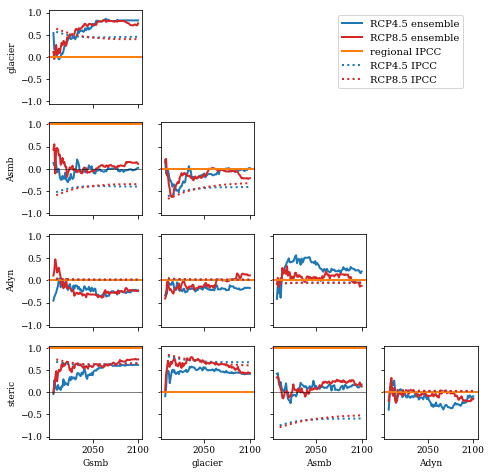

In [13]:
fig,ax = plt.subplots(4,4)
plotcovs(ax[3,0],'steric','Gsmb',1,8,ylab='steric',xlab='Gsmb',showx=True,showy=True)
plotcovs(ax[3,1],'steric','glacier',0,7,xlab='glacier',showx=True)
plotcovs(ax[3,2],'steric','Asmb',1,9,xlab='Asmb',showx=True)
plotcovs(ax[3,3],'steric','Adyn',0,11,xlab='Adyn',showx=True)
plotcovs(ax[2,0],'Adyn','Gsmb',0,20,ylab='Adyn',showy=True)
plotcovs(ax[2,1],'Adyn','glacier',0,16)
plotcovs(ax[2,2],'Adyn','Asmb',0,23)
plotcovs(ax[1,0],'Asmb','Gsmb',1,18,ylab='Asmb',showy=True)
plotcovs(ax[1,1],'Asmb','glacier',0,14)
plotcovs(ax[0,0],'glacier','Gsmb',0,13,ylab='glacier',showy=True)
ax[0,1].set_visible(False)
ax[0,2].set_visible(False)
ax[0,3].set_visible(False)
ax[1,2].set_visible(False)
ax[1,3].set_visible(False)
ax[2,3].set_visible(False)

ax[0,0].legend(bbox_to_anchor=(4.5, 1))

figname = 'draftplot_ts_codependence.png'

plt.savefig(f'../figures/{figname}',dpi=200)
plt.savefig(f'../../../writing/codependence/figures/{figname}')
plt.show()
plt.close()